## Exercício 3

1. Use the Univariate_analysis.ipynb and the dataset in EFIplus_medit.zip to plot **strip plots**, **histograms**
and **boxplots** (and any additional plot that you feel appropriate - **violin plot**) of Annual Mean Temperature 
(temp_ann) at each of the four catchments with the highest number of fish sampling sites. Try to fit 
each type of graph in a single window. You may change the settings in order to follow the best practices of data 
visualization.

In [87]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [88]:
file_path = 'EFIplus_medit.zip'  # Path to the zip file
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

print(df)

       Site_code   Latitude  Longitude   Country Catchment_name  Galiza  \
0     ES_01_0002  38.102003  -4.096070     Spain   Guadalquivir       0   
1     ES_02_0001  40.530188  -1.887796     Spain           Tejo       0   
2     ES_02_0002  40.595432  -1.928079     Spain           Tejo       0   
3     ES_02_0003  40.656184  -1.989831     Spain           Tejo       0   
4     ES_02_0004  40.676402  -2.036274     Spain           Tejo       0   
...          ...        ...        ...       ...            ...     ...   
5006      PTVO60  40.641612  -8.325149  Portugal          Vouga       0   
5007      PTVO61  40.729015  -8.098851  Portugal          Vouga       0   
5008      PTVO62  40.727959  -8.107344  Portugal          Vouga       0   
5009      PTVO63  40.817783  -8.224903  Portugal          Vouga       0   
5010      PTVO64  40.794352  -8.255380  Portugal          Vouga       0   

      Subsample  Calib_EFI_Medit  Calib_connect  Calib_hydrol  ...  \
0             1              

In [89]:
catchment_counts = df['Catchment_name'].value_counts()
top_4_catchments = catchment_counts.head(4).index
filtered_df = df[df['Catchment_name'].isin(top_4_catchments)]
filtered_df = filtered_df[['temp_ann', 'Catchment_name']]

print (filtered_df)

      temp_ann Catchment_name
1          9.3           Tejo
2         10.1           Tejo
3         10.1           Tejo
4         10.3           Tejo
5         10.6           Tejo
...        ...            ...
4947      17.1           Tejo
4948      17.1           Tejo
4949      16.7           Tejo
4950      16.7           Tejo
4951      16.8           Tejo

[2661 rows x 2 columns]


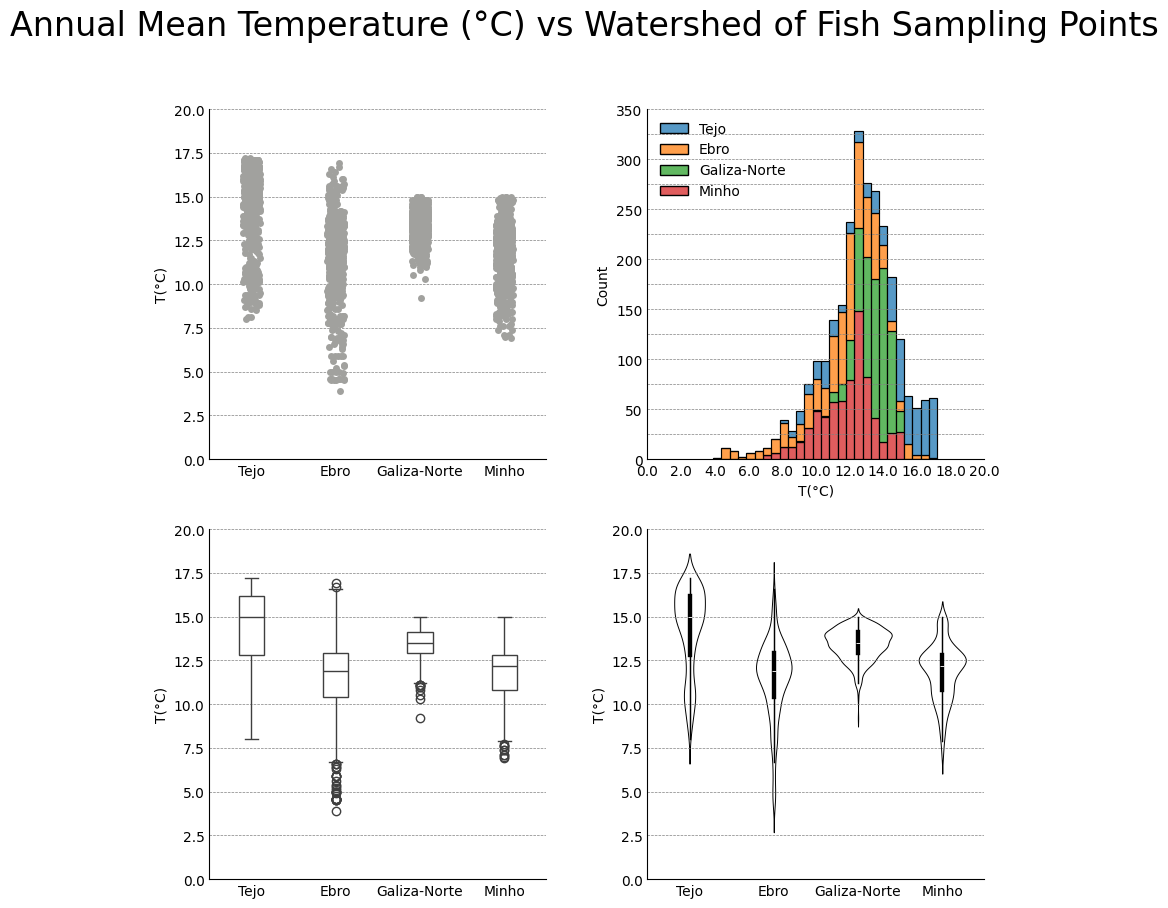

In [90]:
# Criando o layout para 2x2 gráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Strip Plot
sns.stripplot(data=filtered_df, x='Catchment_name', y='temp_ann', facecolor='#a1a19e', ax=axs[0, 0])
axs[0, 0].set_ylim(bottom=0, top=20)
axs[0, 0].set_xlabel('')
axs[0, 0].set_ylabel('T(°C)')

# Histogram
sns.histplot(data=filtered_df, x='temp_ann', hue='Catchment_name', multiple='stack', ax=axs[0, 1], binwidth=0.5)
axs[0, 1].set_xlim(left=0.0, right=20.0)
axs[0, 1].set_ylim(bottom=0.0, top=350)
axs[0, 1].set_xlabel('T(°C)')
axs[0, 1].set_ylabel('Count')
axs[0, 1].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs[0, 1].xaxis.set_major_locator(mticker.MultipleLocator(2))
legend = axs[0, 1].get_legend()
legend.set_title('')  # Remove o título da legenda
legend.set_frame_on(False)  # Remove o contorno da legenda

# Boxplot
sns.boxplot(data=filtered_df, x='Catchment_name', y='temp_ann', width=0.3, boxprops=dict(facecolor='white'), ax=axs[1, 0])
axs[1, 0].set_ylim(bottom=0, top=20)
axs[1, 0].set_xlabel('')
axs[1, 0].set_ylabel('T(°C)')

# Violin Plot
sns.violinplot(data=filtered_df, x='Catchment_name', y='temp_ann', facecolor='white', edgecolor='black', linewidth=0.7, ax=axs[1, 1])
axs[1, 1].set_ylim(bottom=0, top=20)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('T(°C)')

# Adicionar gridlines horizontais nos gráficos
for ax in [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]]:
    for spine in ax.spines.values():
        spine.set_visible(False)  # Remove a borda externa do gráfico
    ax.tick_params(axis='both', which='both', length=0)  # Remove os ticks externos

    # Deixa as linhas dos eixos visíveis
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)

    # Adicionar as gridlines horizontais
    ax.grid(axis='y', linestyle='--', linewidth=0.5, color='gray')  # Adiciona gridlines horizontais

# Definir os ticks do eixo Y de 50 em 50
axs[0, 1].yaxis.set_major_locator(mticker.MultipleLocator(50))
# Adicionar gridlines horizontais a cada 25 no eixo Y
axs[0, 1].yaxis.set_minor_locator(mticker.MultipleLocator(25))  # Define gridlines de 25 em 25 no eixo Y
axs[0, 1].grid(axis='y', linestyle='--', linewidth=0.5, color='gray', which='both')  # Adiciona gridlines horizontais

fig.suptitle('Annual Mean Temperature (°C) vs Watershed of Fish Sampling Points', fontsize=24)

# Ajustar o layout
plt.subplots_adjust(hspace=0.2, wspace=0.3) 

# Exibir os gráficos
plt.show()


3. Have a deeper look at the three types of plots and evaluate the pros and cons of each type as 
univariate visualizations.

**Strip Plot**
- Permite uma visão clara das distribuições dos dados
- Bom para identificar outliers
- Com a variáveis categóricas (Catchment_name), permite ver diferenças entre categorias que se distribuem ao longo da variável contínua (temp_ann)
- Caso haja muitas obseservações, os pontos podem sobrepor-se uns aos outros, dificultando a visualização

**Histograma**
- Boa visualização e identificação da distribuição dos dados
- Facilidade de interpretação, mesmo com grandes volumes de dados
- Forte dependência da escolha dos intervalos, visto que eles afetam a aparência do histograma
- Informações perdidas acerca dos dados individuais, pois são agrupados em intervalos
- Dificuldade para perceber as diferenças entre várias categorias

**Boxplot**
- Visualização clara dos quartis e outliers
- Compreensão rápida da variabilidade entre classes
- A distribuição dos dados é apresentada com menor detalhe sobre a distribuição exata, embora o boxplot forneça um resumo útil
- Se os dados forem levemente aleatórios, o boxplot pode não mostrar a sua verdadeira distribuição de forma clara

3. Construct a plot that shows how the mean value of temp_ann varies with the size 
of random samplings of sites. Take 1000 random samples with replacement of increasing sample sizes 
(e.g. 10, 50, 100, 150, 200, 250, 300, 500 and 1000 observations), compute the mean Temp_ann of each 
sample and use an appropriate visualization to show how many samples will we need to have a good 
estimate of the population mean

In [91]:
df_temp_ann = df[['temp_ann']]

# Global mean of 'temp_ann'
global_mean = df_temp_ann.mean()
global_mean_value = global_mean.iloc[0] 

# List of sample sizes to use
sample_sizes = [10, 50, 100, 150, 200, 250, 300, 500, 1000]

# List to store the mean temp_ann for each sample size
sample_means = []

# Lista para armazenar TODAS as médias individuais das 1000 amostragens para cada sample size
all_sample_means = []

for sample_size in sample_sizes:
    sample_temp_means = []
    for _ in range(1000):
        sample = df_temp_ann.sample(n=sample_size, replace=True)
        sample_temp_means.append(sample['temp_ann'].mean())

    # Armazena todas as 1000 médias amostrais para cada sample size
    all_sample_means.append(sample_temp_means)
    
    # Armazena a média geral das 1000 amostras
    sample_means.append(np.mean(sample_temp_means))


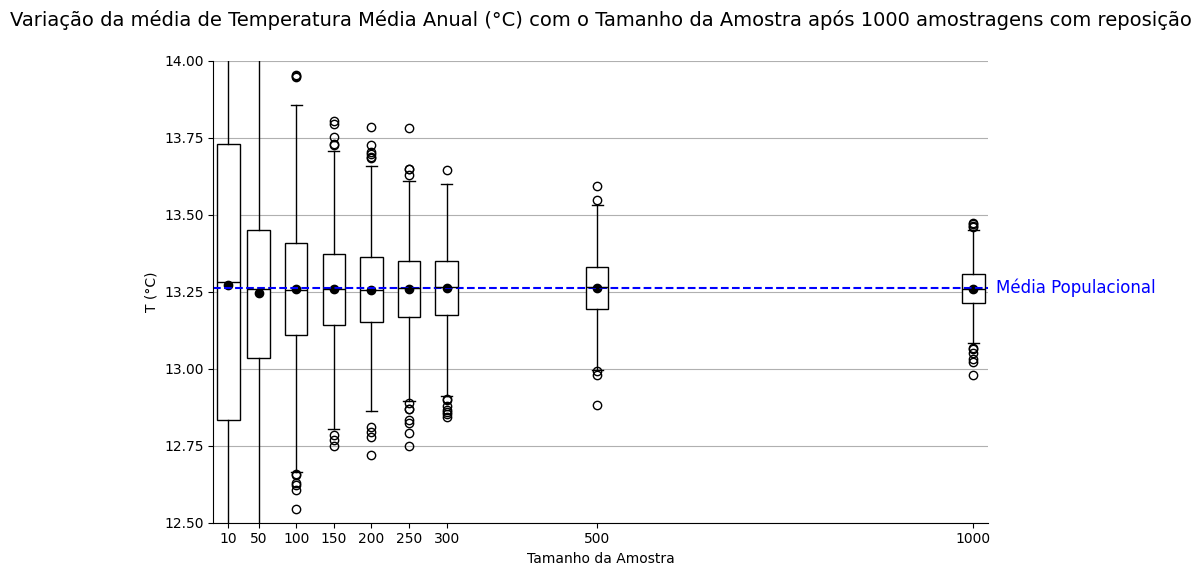

In [ ]:
plt.figure(figsize=(10, 6))

# Criar o boxplot das médias amostrais para cada tamanho de amostra
plt.boxplot(all_sample_means, positions=sample_sizes, widths=30, patch_artist=True, 
            boxprops=dict(facecolor='white', color='black'),
            medianprops=dict(color='black'))

# Substituir a linha conectando as médias por apenas pontos individuais
plt.plot(sample_sizes, sample_means, marker='o', linestyle='', color='black', label='Média das amostras')

# Ajustar o eixo X para mostrar apenas os valores dos tamanhos das amostras
plt.xticks(sample_sizes)

# Adicionar rótulos e título
plt.xlabel('Tamanho da Amostra')
plt.ylabel('T (°C)')
plt.title('Variação da média de Temperatura Média Anual (°C) com o Tamanho da Amostra após 1000 amostragens com reposição', fontsize=14, pad=25)

# Adicionar linha horizontal representando a média global
plt.axhline(global_mean_value, color='b', linestyle='--', label='Média Populacional')

# Adicionar legenda
plt.legend()

# Definir limites para os eixos
plt.ylim(12.5, 14)
plt.xlim(-10, 1020)

# Definir os ticks do eixo Y com step de 0.25
plt.yticks(np.arange(12.5, 14.1, 0.25))  

plt.grid(True, axis='y')

# Remover bordas externas, exceto a da esquerda e de baixo
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remover a legenda
plt.legend().remove()

# Adicionar o texto próximo à linha horizontal da média global
plt.text(x=max(sample_sizes) + 30, y=global_mean_value - 0.03, 
         s="Média Populacional", color='b', fontsize=12, verticalalignment='bottom')

# Exibir o gráfico
plt.show()

O tamanho da amostra não afeta fortemente as estimativas da média populacional, a partir da média amostral. Isto verifica-se desde que se façam repetições suficientes (neste caso realizaram-se 1000 para todos os tamanhos de amostra). Apesar de os valores da média amostral, para qualquer tamanho de amostra, serem próximos da média populacional, com amostras maiores, a média amostral tende a se aproximar mais da média populacional. Caso se realizem menos repetições na amostragem, podemos reparar que, em amostras de menor tamanho, existe uma maior probabilidade de o valor da média amostral se afastar da média populacional, derivado da distribuição menos homogénea quando comparando com amostras de maior tamanho, como podemos verificar no gráfico acima.